# Customer Segmentation Analysis Using Clustering

## Introduction
In today's competitive market, understanding customer behavior and preferences is crucial for businesses to tailor their marketing strategies effectively. This project leverages clustering techniques to segment customers based on various attributes such as demographics, purchasing behavior, and response to marketing campaigns. By identifying distinct customer segments, businesses can develop targeted marketing strategies that resonate with each group's unique characteristics and needs.
This notebook provides a comprehensive analysis of customer data using clustering algorithms, followed by actionable insights and marketing strategies tailored for each identified segment.

In [32]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [33]:
#load data
df = pd.read_csv('customer_segmentation.csv')

In [34]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [35]:
df.shape

(2240, 29)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [37]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [38]:
df.duplicated().sum()

0

In [39]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- We have 24 Income values null so we have to impute it also we have to encode the categorical columns so we can apply clustering

In [40]:
imputer = SimpleImputer(strategy='mean')
df['Income'] = imputer.fit_transform(df[['Income']])

In [41]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

- Imputing done successfully, we don't have any missing value

In [42]:
# One hot encode Marital_Status (nominal data)
encoder = OneHotEncoder(sparse=False)
df['Marital_Status'] = encoder.fit_transform(df[['Marital_Status']])
# Label encode Education (ordinal data)
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

# Dealing with Dt_Customer
# convert Dt_Customer to datatime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
# calculate the earliest join date
reference_date = df['Dt_Customer'].min()
# calculate days since joining for each customer
df['Days_since_joining'] = (df['Dt_Customer'] - reference_date).dt.days
df.drop('Dt_Customer', axis=1, inplace=True)
# scale numerical features
scale = StandardScaler()
num_features = df.select_dtypes(include=[np.number]).columns
df[num_features] = scale.fit_transform(df[num_features])

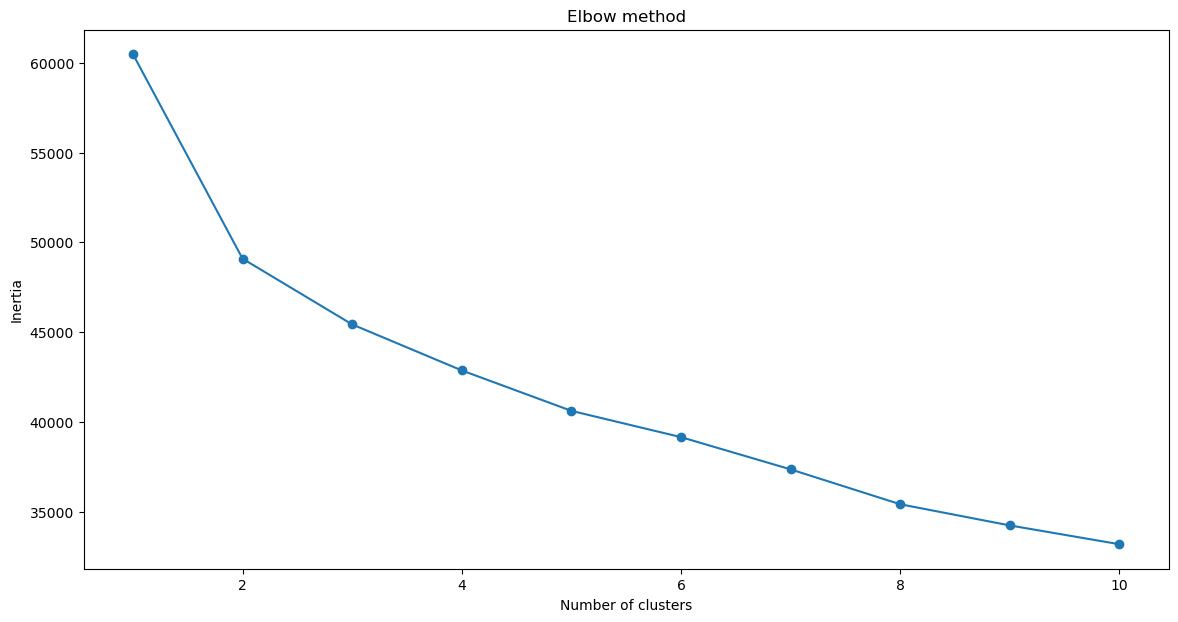

In [45]:
# Determine teh optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
# visualize elbow curve
plt.figure(figsize=(14, 7))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
    

- **4** is the optimal number of clusters based on the plot

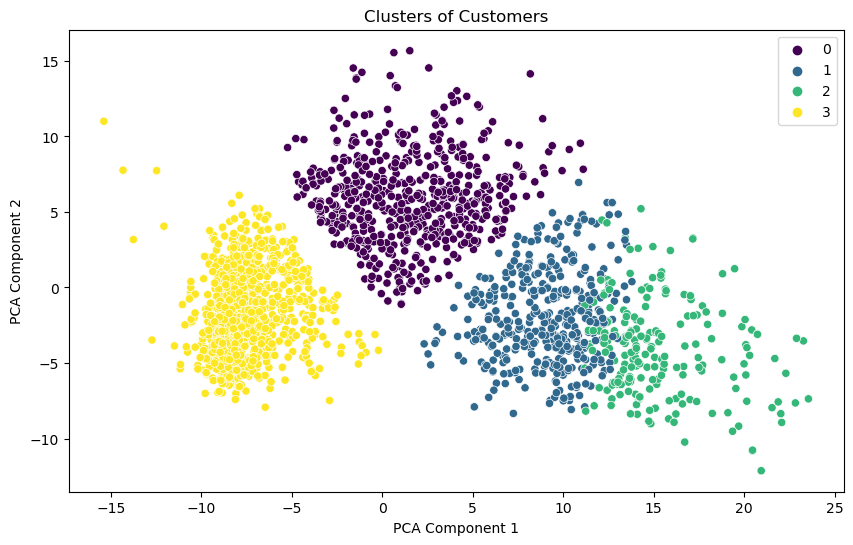


               ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
Cluster                                                                        
0       -0.030044   -0.390655   0.248709       -0.029894  0.199597 -0.363131   
1        0.027563   -0.063536  -0.090411        0.052981  0.758952 -0.724052   
2       -0.012732    0.030183   0.038646        0.125833  1.310217 -0.756091   
3        0.009086    0.242773  -0.115311       -0.029894 -0.685704  0.650181   

         Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp1  \
Cluster                                           ...                 
0        0.813694 -0.045909  0.477030  -0.158701  ...     -0.131031   
1       -0.438861  0.030758  0.528881   0.968504  ...     -0.009804   
2       -0.844461 -0.001368  1.445080   1.181960  ...      1.634301   
3       -0.118480  0.014563 -0.782801  -0.535538  ...     -0.262111   

         AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
Cluster             

In [54]:
# Train the K-means model with the optimal number of clusters found which is 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
# reduce dimensions using pca
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

print()
# Analyze the cluster profiles
cluster_profiles = df.groupby('Cluster').mean()
print(cluster_profiles)

## General Insights:
- The data has been clustered into four groups (`labeled 0, 1, 2 and 3`).
- Each cluster represents a segment of the population with unique characteristics in terms of demographic, economic, and behavioral attributes.
- **Cluster 0**: Low income, high education, more kids at home, low spending on wines and fruits, low response to campaigns.
  
- **Cluster 1**: High income, average education, more kids at home, high spending on wines and fruits, high response to campaigns.

- **Cluster 2**: Average income, low education, more teenagers at home, moderate spending on wines, negative spending on fruits, moderate response to campaigns.

- **Cluster 3**: Slightly above average income, slightly below average education, more kids at home, moderate spending on wines, high spending on fruits, slightly lower response to campaigns.

## Implications for Marketing:
- **Cluster 0** could be targeted with affordable products, educational content and resources that align with their higher education level and family oriented products and services.

- **Cluster 1** could be targeted with luxury and premium products, particularly in categories like wines and gourmet foods, offer premium family packages.

- **Cluster 2** could be targeted with moderately priced products. products and services that appeal to households with teenagers, such as tech gadgets, educational tools, and entertainment options.

- **Cluster 3** could be targeted with balanced offers that combine affordable luxury with practical family products, Promote health-oriented products, particularly fruits and other nutritious options highlighting their high spending in this category, offer discounts and promotions on family-oriented products and services.
